## Data Processing

In [12]:
import os
import cv2

In [30]:
data_dir = '../dataset'

In [31]:
for path, subdirs, files in os.walk(data_dir):
    dir_name = path.split(os.path.sep)[-1]
    #print(dir_name)
    if dir_name == 'images':
        images = os.listdir(path)
        print(path)
        #print(images)
        for i, image_name in enumerate(images):
            #print(image_name)
            variable = True

# images -> JPG
# masks -> PNG

../dataset/Tile 8/images
../dataset/Tile 1/images
../dataset/Tile 6/images
../dataset/Tile 7/images
../dataset/Tile 5/images
../dataset/Tile 2/images
../dataset/Tile 3/images
../dataset/Tile 4/images


In [32]:
image = cv2.imread(os.path.join('../','dataset','Tile 1','images','image_part_001.jpg'))
image.shape

(644, 797, 3)

In [33]:
from matplotlib import pyplot as plt 

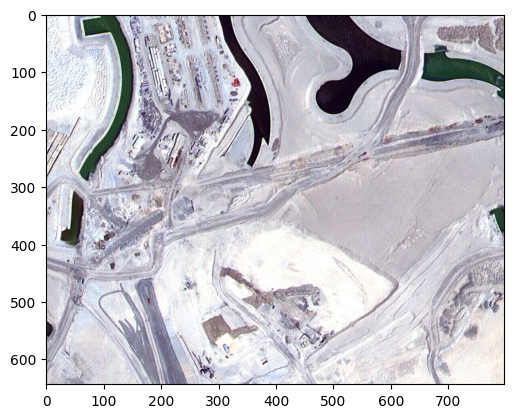

In [34]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [48]:
im = cv2.imread(f'{data_dir}/Tile 1/images/image_part_001.jpg')

In [53]:
print(type(im))

<class 'numpy.ndarray'>


In [49]:
image_patch_size = 256

In [51]:
(im.shape[0]//image_patch_size)*image_patch_size

512

In [59]:
image_dataset = []

In [61]:
from PIL import Image
import numpy as np

In [71]:
from patchify import patchify

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [62]:
type(Image.fromarray(im))

PIL.Image.Image

In [ ]:

image_extension = 'jpg'
for tile_id in range(1,8):
    for image_id in range(1,10):
        image = cv2.imread(f'{data_dir}/Tile {tile_id}/images/image_part_00{image_id}.{image_extension}',1)
        if image is not None:
            #print(image.shape)
            size_x = (image.shape[1]//image_patch_size)*image_patch_size
            size_y = (image.shape[0]//image_patch_size)*image_patch_size
            #print("{} --- {} - {}".format(image.shape, size_x, size_y))
            image = Image.fromarray(image)
            image = image.crop((0,0, size_x, size_y))
            #print('{} - {}'.format(image.size[0], image.size[1]))
            image = np.array(image)
            patched_images = patchify(im, (image_patch_size, image_patch_size, 3), step=image_patch_size)
            #print(len(patched_images))
            for i in range(patched_images.shape[0]):
                for j in range(patched_images.shape[1]):
                    individual_patched_image = patched_images[i,j,:,:]
                    print(individual_patched_image.shape)

In [68]:
image_patches = patchify(im, (image_patch_size, image_patch_size, 3), step=image_patch_size)

In [70]:
len(image_patches)

2

## TO FIX
- conflict intre pachete 
    - scikit-learn foloseste distutils care nu este inclus implicit in Python 3.12 
    - intre numpy si scikit-learn